In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
import nltk
from collections import Counter

In [2]:
recipes = pd.read_pickle('data/raw_df.pkl')
data = pd.read_csv('data/RAW_interactions.csv')

In [3]:
recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"[60-minutes-or-less, time-to-make, course, mai...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"[make a choice and proceed with recipe, depend...",autumn is my favorite time of year to cook! th...,"[winter squash, mexican seasoning, mixed spice...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"[30-minutes-or-less, time-to-make, course, mai...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"[preheat oven to 425 degrees f, press dough in...",this recipe calls for the crust to be prebaked...,"[prepared pizza crust, sausage patty, eggs, mi...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"[time-to-make, course, preparation, main-dish,...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"[brown ground beef in large pot, add chopped o...",this modified version of 'mom's' chili was a h...,"[ground beef, yellow onions, diced tomatoes, t...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"[60-minutes-or-less, time-to-make, course, mai...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,[place potatoes in a large pot of lightly salt...,"this is a super easy, great tasting, make ahea...","[spreadable cheese with garlic and herbs, new ...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"[weeknight, time-to-make, course, main-ingredi...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,"[mix all ingredients& boil for 2 1 / 2 hours ,...",my dh's amish mother raised him on this recipe...,"[tomato juice, apple cider vinegar, sugar, sal...",8


In [18]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
name              231636 non-null object
id                231637 non-null int64
minutes           231637 non-null int64
contributor_id    231637 non-null int64
submitted         231637 non-null object
tags              231637 non-null object
nutrition         231637 non-null object
n_steps           231637 non-null int64
steps             231637 non-null object
description       226658 non-null object
ingredients       231637 non-null object
n_ingredients     231637 non-null int64
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


In [4]:
sum(recipes.n_ingredients)

2096582

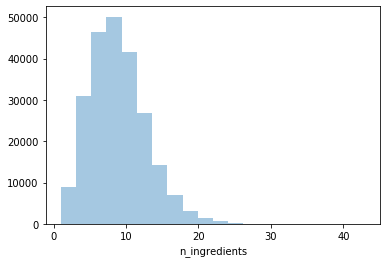

In [9]:
sns.distplot(recipes.n_ingredients,bins=20, kde=False)
plt.savefig('output/num_ing.png')

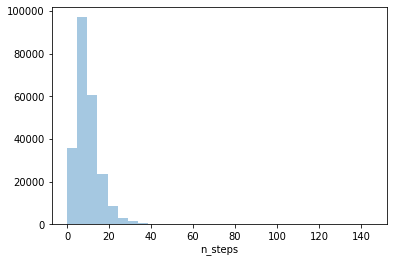

In [10]:
sns.distplot(recipes.n_steps,bins=30, kde=False)

plt.savefig('output/steps.png')

In [25]:
recipes['calorie'] = [item[0] for item in recipes.nutrition]

In [26]:
recipes['calorie'] = recipes.calorie.clip(0,5000)

In [13]:
sorted(recipes.calorie)[-100:]

[10524.7,
 10562.8,
 10653.9,
 10669.3,
 10687.7,
 10689.6,
 10804.3,
 10805.8,
 10952.1,
 10961.7,
 10970.5,
 11036.6,
 11050.8,
 11052.0,
 11056.3,
 11083.0,
 11236.0,
 11249.0,
 11280.1,
 11307.8,
 11312.0,
 11321.9,
 11488.8,
 11510.6,
 11661.4,
 11670.9,
 11677.4,
 11760.6,
 11787.4,
 11811.4,
 11921.5,
 11925.0,
 12086.5,
 12110.9,
 12135.5,
 12176.2,
 12194.6,
 12197.4,
 12216.2,
 12365.6,
 12489.4,
 12571.5,
 12594.2,
 12672.9,
 12887.4,
 12914.1,
 13006.6,
 13029.1,
 13101.5,
 13117.2,
 13171.5,
 13213.2,
 13323.6,
 13439.5,
 13465.2,
 13597.5,
 13598.2,
 13742.2,
 13779.2,
 14078.1,
 14082.0,
 14332.8,
 14681.5,
 14789.4,
 14945.6,
 15309.6,
 15368.5,
 15419.9,
 15829.7,
 16372.2,
 16894.9,
 17280.4,
 17287.5,
 17551.6,
 17554.0,
 18237.8,
 18268.7,
 18656.0,
 19380.6,
 19382.1,
 19396.8,
 21190.1,
 21497.8,
 22371.2,
 23343.1,
 25712.6,
 26604.4,
 28930.2,
 29088.7,
 30933.4,
 36188.8,
 38662.3,
 38680.1,
 40159.2,
 42951.6,
 43924.6,
 44239.8,
 45609.0,
 101614.7,
 434360.2

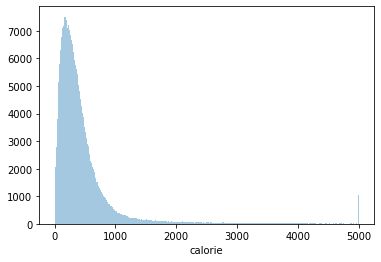

In [27]:
sns.distplot(recipes.calorie,bins=300, kde=False)
ax = plt.gca()
plt.savefig('output/cal.png')

In [22]:
def treat_ingredients(input):
    output = []
    for ingredient in input:
        ingredient_list = ingredient.split(' ')
        output.append("_".join(ingredient_list))
    return " ".join(output)

In [23]:
# convert ingredients to the format that we want
ingredients_all = recipes.ingredients.apply(lambda x: treat_ingredients(x))

In [24]:
# join all ingredients in one big corpus
ingredients_corpus = " ".join(list(ingredients_all))
ingredients_corpus = nltk.Text(nltk.word_tokenize(ingredients_corpus))

In [25]:
# convert it into frequency distribution using FreqDist
ingre_dist = FreqDist(ingredients_corpus)

In [26]:
# get ingredient names
ing_key =  list(ingre_dist.keys())

In [27]:
len(ing_key)

14980

In [28]:
# construct (ingredient name, frequency) tupples for later
ing_freq = []
for key in ing_key:
    ing_freq.append((key,ingre_dist[key]))

ing_freq_sorted = sorted(ing_freq,key = lambda x: x[1],reverse = True)

In [29]:
# convert data to df for plot
df_ing = pd.DataFrame(ing_freq_sorted[:20], columns =['Tag', 'Freq']) 

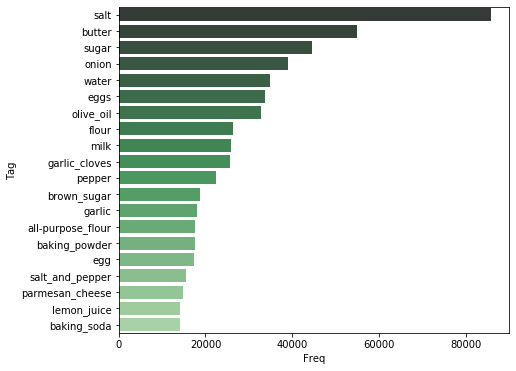

In [30]:
# plotting the most frequenstly used ingredients in the recipes
f, ax = plt.subplots(figsize=(7, 6))
sns.barplot(x="Freq", y="Tag", data=df_ing,palette="Greens_d",ax = ax)

In [31]:
data.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [62]:


recipe_counts = dict(Counter(data.recipe_id))

In [33]:
import operator
sorted_recipes = sorted(recipe_counts.items(), key=operator.itemgetter(1),reverse = True)

In [35]:
recipes_names = dict([(rep_id,name) for name,rep_id in zip(recipes.name,recipes.id)])

In [40]:
def translate_recipe_names(results,rep_names = recipes_names):
    return [pretty_text(rep_names[r]) for r in results]

def pretty_text (text):
    ''' This function takes in text and try to put it in a human readable format by putting back \' and making it capitalize
    '''
    text = text.replace(" s ","\'s ")
    text_split = text.split(" ")
    #print(text_split)
    text_split = [t.strip().capitalize() for t in text_split if t != '']
    #print(text_split)
    return " ".join(text_split)

In [70]:
n=8
popular_keys = [key[0] for key in sorted_recipes[:n]]
popular_counts = [key[1] for key in sorted_recipes[:n]]

Text(0.5, 0, 'Frequency')

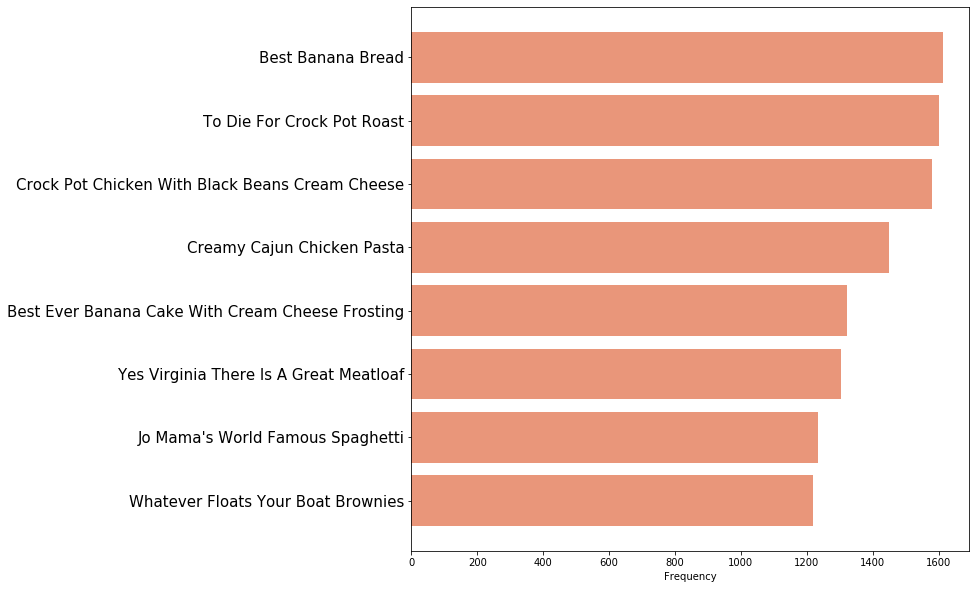

In [71]:
f, ax = plt.subplots(figsize=(10, 10))
ax.barh(range(n), popular_counts[::-1], align='center',color='#E9967A')
ax.set_yticks(range(n))
ax.set_yticklabels(translate_recipe_names(popular_keys[::-1]),fontsize=15)
ax.set_xlabel('Frequency')

In [61]:
data.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [54]:
recipe_counts = dict(Counter(data.recipe_id))
recipe_df = pd.DataFrame.from_dict(recipe_counts,orient='index').reset_index().rename(columns={'index':'recipe_id',0:'rep_count'})
data_merge = data.merge(recipe_df,how='left',left_on='recipe_id',right_on = 'recipe_id')

In [55]:
mask = data_merge.rep_count > 10

In [56]:
popular_rep = pd.DataFrame(data_merge[mask].groupby('recipe_id').rating.mean())

In [57]:
popular_rep.head()

,rating
recipe_id,
49,4.350000
62,4.681818
66,4.947368
142,4.681818
150,4.583333


In [58]:
popular_rep = popular_rep.sort_values(by=['rating'],ascending = False)

In [61]:
translate_recipe_names(list(popular_rep[:10].index))

["Nif's Grilled Hawaiian Chicken Skewers",
 'Sage And Rosemary Pork Chops',
 'Lemony Shrimp And Potato Cakes With Tricolor Salsa',
 'Chocolate Macadamia Nut Brownies',
 'Fried Scallops For Four',
 'Cucumber Open Faced Sandwiches',
 'Hot Mulled Apple Cider With Apples Orange Cinnamon',
 'Fruit Loops Non Alcoholic Cocktail',
 'Rhubarb Shortbread',
 'Guava Bars']

In [95]:
popular_rep.head(10)

,rating
recipe_id,
379045,5.0
117570,5.0
475907,5.0
117376,5.0
272719,5.0
17111,5.0
395390,5.0
273893,5.0
60385,5.0
